In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Dataset-SA.csv')

In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5.0,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5.0,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3.0,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1.0,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3.0,fair,ok ok product,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11037 entries, 0 to 11036
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   11037 non-null  object 
 1   product_price  11037 non-null  int64  
 2   Rate           11036 non-null  float64
 3   Review         11036 non-null  object 
 4   Summary        11036 non-null  object 
 5   Sentiment      11036 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 517.5+ KB


In [ ]:
# Dropping rows where 'Review' is missing, as it's the main text column for sentiment analysis
df = df.dropna(subset=['Review'])

# Converting 'Rate' column to numeric
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Checking unique sentiment labels
df['Sentiment'] = df['Sentiment'].str.lower().str.strip()
sentiment_counts = df['Sentiment'].value_counts()

# Display cleaned data info and sentiment distribution
df.info(), sentiment_counts

<class 'pandas.core.frame.DataFrame'>
Index: 11036 entries, 0 to 11035
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   11036 non-null  object 
 1   product_price  11036 non-null  int64  
 2   Rate           11036 non-null  float64
 3   Review         11036 non-null  object 
 4   Summary        11036 non-null  object 
 5   Sentiment      11036 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 603.5+ KB


(None,
 Sentiment
 positive    9145
 negative    1407
 neutral      484
 Name: count, dtype: int64)

 **1.First line explain this is a pandas dataframe**

**2.There are 205052** **entries**.

**3.This dataframe contain 6 columns**

**4.All 6 columns are object(string).**

**5.Rate column has datatype object, thats a rating column so change to numerical**

In [ ]:
#Checking null values
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,0
Sentiment,0


In [ ]:
#Removed null values and stored
df=df.dropna()

In [ ]:
#confirming null values are removed.
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,0
Sentiment,0


In [ ]:
#Checking Duplicates
df.duplicated().sum()

614

In [ ]:
#removing duplicates
df=df.drop_duplicates()

In [ ]:
#Confirming
df.duplicated().sum()

0

In [ ]:
import re # Import the 're' module for regular expression operations
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Alternative stopwords set from sklearn
stop_words = set(ENGLISH_STOP_WORDS)

# Function for text preprocessing without NLTK dependencies
def preprocess_text_simple(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    tokens = text.split()  # Simple tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Stopword removal
    return ' '.join(tokens)

# Applying preprocessing to the 'Review' column
df['Cleaned_Review'] = df['Review'].astype(str).apply(preprocess_text_simple)

# Display sample cleaned reviews
df[['Review', 'Cleaned_Review']].head()

,Review,Cleaned_Review
0,super!,super
1,awesome,awesome
2,fair,fair
3,useless product,useless product
4,fair,fair


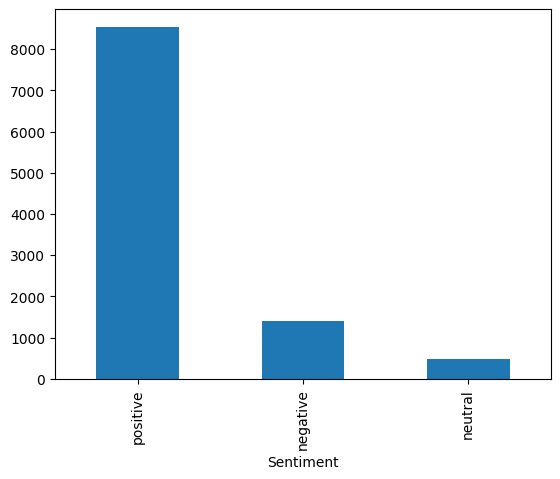

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df['Rate'].value_counts().sort_index()

,count
Rate,
1.0,1072
2.0,266
3.0,757
4.0,2092
5.0,6235


In [ ]:
df = df[df['Rate'] != 'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)']
df = df[df['Rate'] != 'Bajaj DX 2 L/W Dry Iron']
df = df[df['Rate'] != 'Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)']

In [ ]:
df['Rate'].value_counts().sort_index()

,count
Rate,
1.0,1072
2.0,266
3.0,757
4.0,2092
5.0,6235


In [ ]:
#Changing the datatype of the column
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

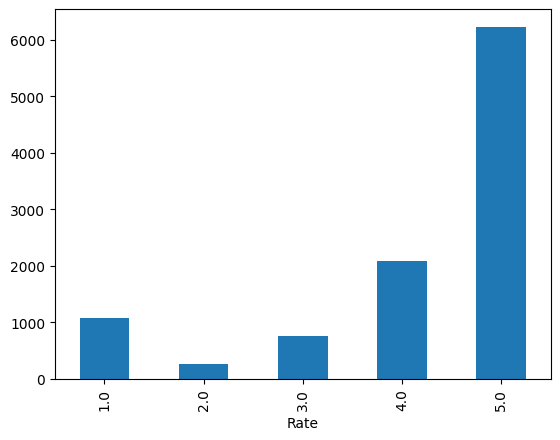

In [ ]:
df['Rate'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

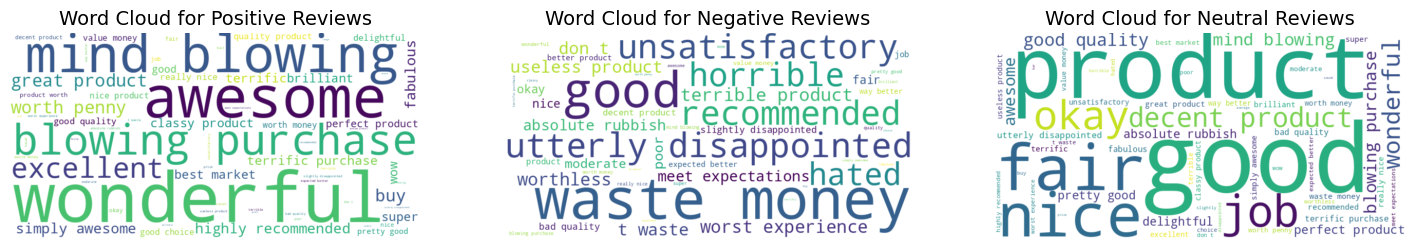

In [ ]:
# Generate word clouds for each sentiment
sentiments = ['positive', 'negative', 'neutral']
wordclouds = {}

for sentiment in sentiments:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Cleaned_Review'])
    wordclouds[sentiment] = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word clouds
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, sentiment in enumerate(sentiments):
    axes[i].imshow(wordclouds[sentiment], interpolation='bilinear')
    axes[i].set_title(f'Word Cloud for {sentiment.capitalize()} Reviews', fontsize=14)
    axes[i].axis('off')

plt.show()

<ipython-input-21-55493730e32e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette='viridis', order=['positive', 'negative', 'neutral'])


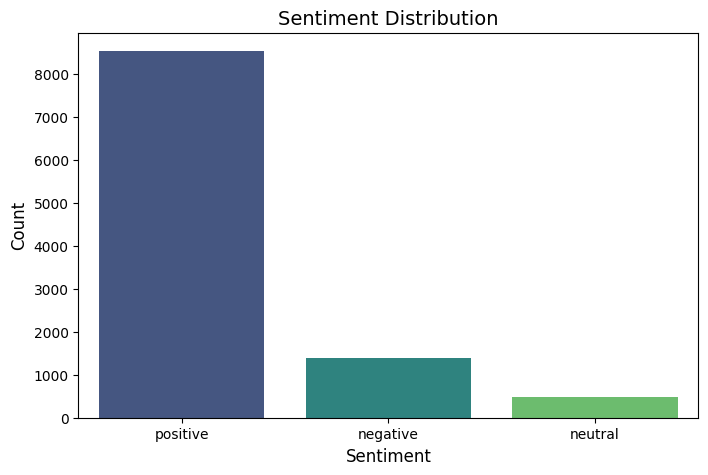

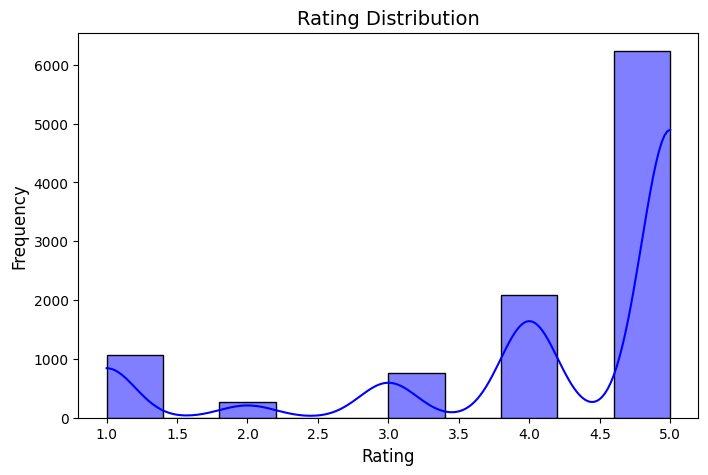

<ipython-input-21-55493730e32e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Sentiment'], y=df['Rate'], palette='coolwarm', order=['positive', 'negative', 'neutral'])


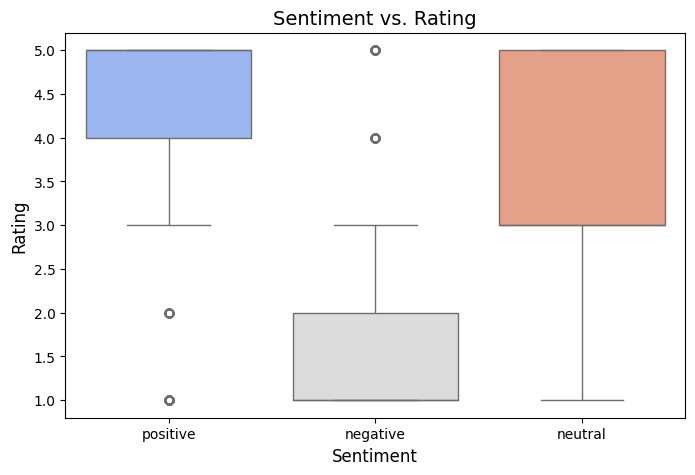

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sentiment'], palette='viridis', order=['positive', 'negative', 'neutral'])
plt.title('Sentiment Distribution', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Rate'].dropna(), bins=10, kde=True, color='blue')
plt.title('Rating Distribution', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Sentiment vs. Rating correlation
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Sentiment'], y=df['Rate'], palette='coolwarm', order=['positive', 'negative', 'neutral'])
plt.title('Sentiment vs. Rating', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

In [ ]:
df['Rate'].value_counts().sort_index()

,count
Rate,
1.0,1072
2.0,266
3.0,757
4.0,2092
5.0,6235


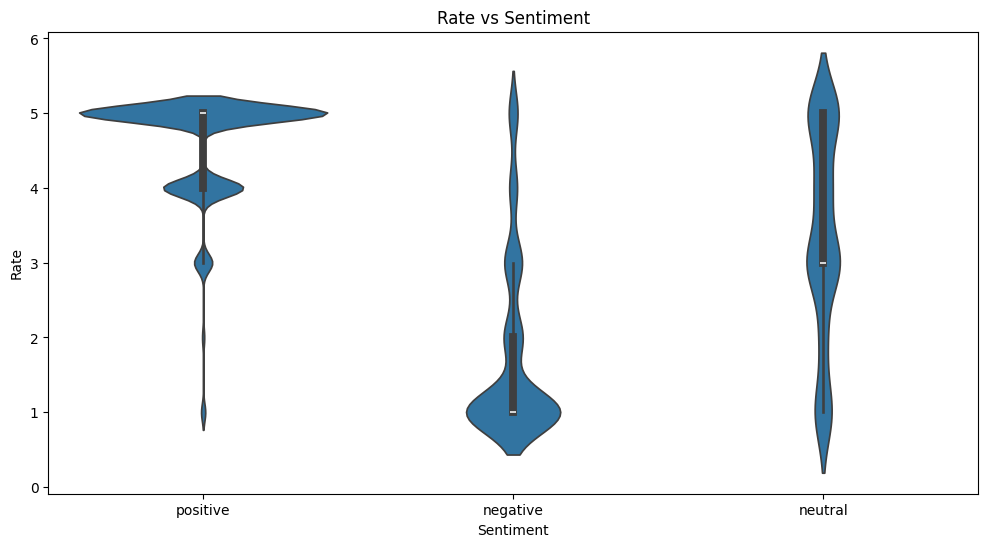

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Sentiment'], y=df['Rate'])
plt.title('Rate vs Sentiment')
plt.show()

In [ ]:

ratings = df["Rate"].value_counts()
numbers = ratings.index
quantity = ratings.values

In [ ]:
import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

In [ ]:
# Downloading Necessary packages
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocessing(text):

  # Step 1: Convert to lowercase
  text = text.lower()

  # Step 1: Convert to lowercase
  text = re.sub(r'[^a-zA-Z\s]','', text)

  # Step 3: Tokenize text
  tokens = word_tokenize(text)

  # Step 4: Remove stopwords
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [token for token in tokens if token not in stop_words]


  # Step 6: Join tokens back into a single string
  preprocessed_text = ' '.join(filtered_tokens)
  return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features (X) and target (y)
X = df['Cleaned_Review']
y = df['Sentiment']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features to 5000 for efficiency
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display shape of transformed data
X_train_tfidf.shape, X_test_tfidf.shape

((8337, 145), (2085, 145))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features (X) and target (y)
X = df['Cleaned_Review']
y = df['Sentiment']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features to 5000 for efficiency
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display shape of transformed data
X_train_tfidf.shape, X_test_tfidf.shape

((8337, 145), (2085, 145))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(kernel='linear', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate function
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['positive', 'negative', 'neutral'])
    return accuracy, report

# Train and evaluate each model
results = {}
for name, model in zip(["Logistic Regression", "SVM", "Random Forest"], [log_reg, svm, rf]):
    accuracy, report = train_evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test)
    results[name] = (accuracy, report)

# Display results
results

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

{'Logistic Regression': (0.9112709832134293,
  '              precision    recall  f1-score   support\n\n    positive       0.82      0.79      0.80       280\n    negative       0.00      0.00      0.00        96\n     neutral       0.93      0.98      0.95      1709\n\n    accuracy                           0.91      2085\n   macro avg       0.58      0.59      0.59      2085\nweighted avg       0.87      0.91      0.89      2085\n'),
 'SVM': (0.9112709832134293,
  '              precision    recall  f1-score   support\n\n    positive       0.82      0.79      0.80       280\n    negative       0.00      0.00      0.00        96\n     neutral       0.93      0.98      0.95      1709\n\n    accuracy                           0.91      2085\n   macro avg       0.58      0.59      0.59      2085\nweighted avg       0.87      0.91      0.89      2085\n'),
 'Random Forest': (0.9112709832134293,
  '              precision    recall  f1-score   support\n\n    positive       0.82      0.79  

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for tuning
param_grid_logreg = {'C': [0.1, 1, 10]}  # Regularization parameter for Logistic Regression
param_grid_svm = {'C': [0.1, 1, 10]}  # Regularization for SVM
param_grid_rf = {'n_estimators': [50, 100, 200]}  # Number of trees for Random Forest

# Hyperparameter tuning using GridSearchCV
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_

# Tune models
best_params = {}
best_scores = {}

for name, model, param_grid in zip(["Logistic Regression", "SVM", "Random Forest"],
                                   [log_reg, svm, rf],
                                   [param_grid_logreg, param_grid_svm, param_grid_rf]):
    params, score = tune_model(model, param_grid, X_train_tfidf, y_train)
    best_params[name] = params
    best_scores[name] = score

# Display best parameters and scores
best_params, best_scores


({'Logistic Regression': {'C': 1},
  'SVM': {'C': 1},
  'Random Forest': {'n_estimators': 100}},
 {'Logistic Regression': 0.903562432529687,
  'SVM': 0.9030826436367999,
  'Random Forest': 0.9036823797529087})

In [ ]:
# Re-import necessary libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Define features and target variable
X = df['Cleaned_Review']
y = df['Sentiment']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Initialize and train Multinomial Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Predict and evaluate
y_pred = nb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['positive', 'negative', 'neutral'])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Display results
accuracy, report

(0.9031175059952038,
 '              precision    recall  f1-score   support\n\n    positive       0.81      0.73      0.77       280\n    negative       0.00      0.00      0.00        96\n     neutral       0.92      0.98      0.95      1709\n\n    accuracy                           0.90      2085\n   macro avg       0.58      0.57      0.57      2085\nweighted avg       0.86      0.90      0.88      2085\n')

In [ ]:
from imblearn.over_sampling import SMOTE

# Convert labels to numerical values for SMOTE
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)  # Convert categorical labels to numerical

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_encoded)

# Retrain Naïve Bayes on balanced data
nb_model_balanced = MultinomialNB()
nb_model_balanced.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate on test data
y_pred_balanced = nb_model_balanced.predict(X_test_tfidf)
accuracy_balanced = accuracy_score(y_test, label_encoder.inverse_transform(y_pred_balanced))
report_balanced = classification_report(y_test, label_encoder.inverse_transform(y_pred_balanced), target_names=label_encoder.classes_)

# Display results
accuracy_balanced, report_balanced

(0.7654676258992805,
 '              precision    recall  f1-score   support\n\n    negative       0.72      0.78      0.75       280\n     neutral       0.11      0.46      0.18        96\n    positive       0.96      0.78      0.86      1709\n\n    accuracy                           0.77      2085\n   macro avg       0.60      0.67      0.60      2085\nweighted avg       0.89      0.77      0.82      2085\n')

In [ ]:
# Create a dataframe for classification report
report_dict = classification_report(y_test, label_encoder.inverse_transform(y_pred_balanced), target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Display accuracy and classification report in tabular format
accuracy_balanced, report_df

(0.7654676258992805,
               precision    recall  f1-score      support
 negative       0.719472  0.778571  0.747856   280.000000
 neutral        0.111392  0.458333  0.179226    96.000000
 positive       0.961788  0.780573  0.861757  1709.000000
 accuracy       0.765468  0.765468  0.765468     0.765468
 macro avg      0.597551  0.672493  0.596280  2085.000000
 weighted avg   0.890092  0.765468  0.815035  2085.000000)

In [ ]:
# Embedding layer expects the words to be in numeric form
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form
from tensorflow.keras.preprocessing.text import Tokenizer # Import the Tokenizer class
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train) # Make sure X_train is defined

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test) # Make sure X_test is defined

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

149

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import the pad_sequences function

max_length = 100  # Specify the maximum length for padding
X_train = pad_sequences(X_train, maxlen=100, padding='post')
X_test = pad_sequences(X_test, maxlen=100, padding='post')

In [ ]:
X_train.shape

(8337, 100)

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
# Update the path to your downloaded GloVe file
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(149, 100)

In [ ]:
import pandas as pd
import numpy as np
import joblib
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import  Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling1D, Embedding, Conv1D, Flatten, Dense, Input
from keras.layers import Dropout, BatchNormalization, LSTM, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
#CNN-LSTM Model Architecture
model = Sequential()
embedding_layer = Embedding(input_dim=vocab_length,
                            output_dim=100,
                            weights=[embedding_matrix],  #input_length=max_length
                            trainable=False)
model.add(embedding_layer)
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(max_length, 100)))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32, return_sequences = True))
model.add(LSTM(16, return_sequences = False))
model.add(BatchNormalization())
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.001)))

# Model compiling
optimize=Adam(learning_rate=0.00004)
model.compile(optimizer=optimize, loss='binary_crossentropy', metrics=['accuracy'])
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Create a ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │          14,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,900 (58.20 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,900 (58.20 KB)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight


class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

# Convert class_weights to dictionary format
class_weight_dict = dict(enumerate(class_weights))

In [ ]:
class_weight_dict

{0: 2.48125, 1: 7.2558746736292425, 2: 0.40664325431665205}

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training target variable
label_encoder.fit(y_train)

# Transform the training and test target variables
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, use y_train_encoded and y_test_encoded in your model.fit() call
history = model.fit(
    X_train,
    y_train_encoded,  # Use encoded target variable
    batch_size=32,
    epochs=30,
    verbose=1,
    callbacks=[reduce_lr, early_stopping],
    validation_data=(X_test, y_test_encoded),  # Use encoded target variable
    class_weight=class_weight_dict
)

Epoch 1/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 147s 510ms/step - accuracy: 0.0698 - loss: 0.6417 - val_accuracy: 0.0945 - val_loss: -0.3620 - learning_rate: 4.0000e-05
Epoch 2/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 144s 551ms/step - accuracy: 0.0942 - loss: 0.2158 - val_accuracy: 0.0950 - val_loss: -1.1264 - learning_rate: 4.0000e-05
Epoch 3/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 194s 522ms/step - accuracy: 0.0971 - loss: 0.2026 - val_accuracy: 0.0945 - val_loss: -1.2998 - learning_rate: 4.0000e-05
Epoch 4/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 132s 507ms/step - accuracy: 0.0834 - loss: 0.1132 - val_accuracy: 0.1118 - val_loss: -1.2769 - learning_rate: 4.0000e-05
Epoch 5/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 143s 510ms/step - accuracy: 0.0973 - loss: 0.1637 - val_accuracy: 0.1118 - val_loss: -1.2806 - learning_rate: 4.0000e-05
Epoch 6/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 143s 512ms/step - accuracy: 0.0997 - loss: 0.1279 - val_accuracy: 0.1118 - val_loss: -1.3561 - learning_rate: 4.0000e-05
Epoch 7/30
261/261 ━━━━━━━━━━━━━━━

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)  # Use encoded y_test
print(f"Test Accuracy: {test_accuracy:.2f}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.1052 - loss: -2.3225
Test Accuracy: 0.09


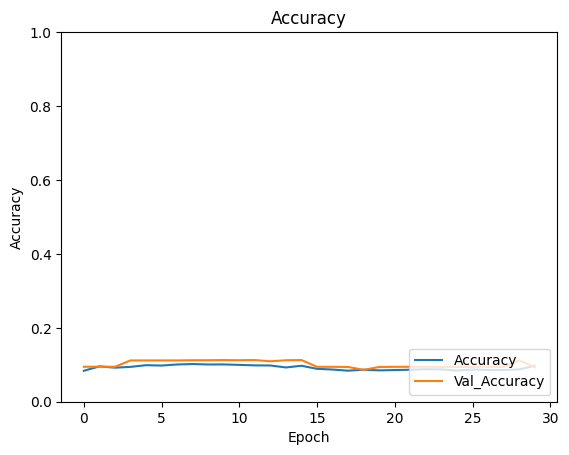

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

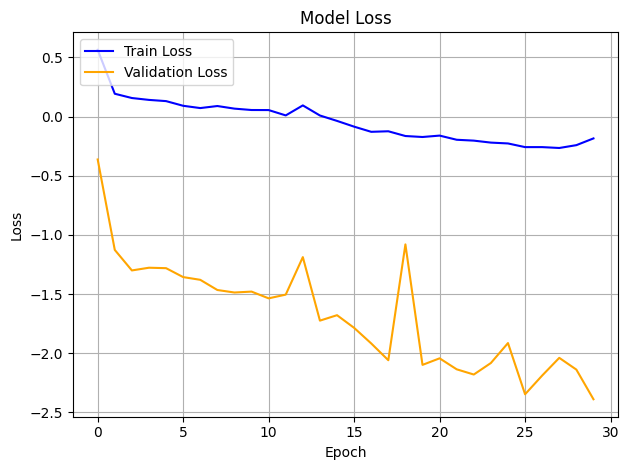

In [ ]:
plt.title('Model Loss')
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)  # Add grid lines for better readability
# Show plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step


array([[0.17037651],
       [0.96258557],
       [0.96258557],
       ...,
       [0.96941596],
       [0.9714888 ],
       [0.9489797 ]], dtype=float32)

In [ ]:
y_pred_class = (np.array(y_pred) >= 0.5).astype(int).ravel()
y_pred_class

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
result=pd.DataFrame({'Actual output': y_test,'Predict Output': y_pred_class})
result

,Actual output,Predict Output
5344,negative,0
8433,neutral,1
546,positive,1
4392,positive,1
1352,positive,1
...,...,...
6888,positive,1
7252,positive,1
6019,positive,1
5724,positive,1


In [ ]:
# Now use y_test_encoded in confusion_matrix
cm = confusion_matrix(y_test_encoded, y_pred_class)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 120  160    0]
 [  21   75    0]
 [  36 1673    0]]


In [ ]:
# Classification report
cr = classification_report(y_test_encoded,y_pred_class)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.43      0.53       280
           1       0.04      0.78      0.07        96
           2       0.00      0.00      0.00      1709

    accuracy                           0.09      2085
   macro avg       0.24      0.40      0.20      2085
weighted avg       0.09      0.09      0.07      2085



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier  # Import the classifier
from sklearn.preprocessing import LabelBinarizer

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Initialize the model
rf_model.fit(X_train_tfidf, y_train) # Assuming you have X_train_tfidf and y_train from previous steps

# Get probability scores for all classes
y_probs = rf_model.predict_proba(X_test_tfidf)

# Binarize the labels for multiclass precision-recall curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_encoded)

# Calculate precision-recall curve for each class
precisions = {}
recalls = {}
thresholds = {}

for i, class_label in enumerate(lb.classes_):
    precisions[class_label], recalls[class_label], thresholds[class_label] = precision_recall_curve(
        y_test_binarized[:, i], y_probs[:, i]
    )

# Further analysis or plotting can be done using the precisions, recalls, and thresholds for each class.
# For example, to plot the precision-recall curve for the 'positive' class:
# import matplotlib.pyplot as plt
# plt.plot(recalls['positive'], precisions['positive'], label='positive')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.legend()
# plt.show()


In [ ]:
x = df[df['Sentiment'] == 'positive']['Rate'].sum()  # Sum of ratings for positive sentiments
y = df[df['Sentiment'] == 'negative']['Rate'].sum()  # Sum of ratings for negative sentiments
z = df[df['Sentiment'] == 'neutral']['Rate'].sum()   # Sum of ratings for neutral sentiments

def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        print("Positive 😊 ")
    elif (b > a) and (b > c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")

sentiment_score(x, y, z)

Positive 😊 


In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  39342.0
Negative:  2470.0
Neutral:  1606.0
